## Teste de Habilidade de Análise de Dados
#### 4intelligence

<h1> Índice Analítico </h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Carregando_Conhecendo o dataset">Carregando e conhecendo o dataset</a></li>
        <li><a href="#pre-processessamento">pre-processessamento</a></li>
        <li><a href="#Visualização previa">Visualização prévia</a></li>
        <li><a href="#Análises Exploratórias">Análises Exploratórias</a></li>
        <li><a href="#setting_up_tree">Configurando a Árvore de Decisão</a></li>
        <li><a href="#modeling">Modelagem</a></li>
        <li><a href="#prediction">Predição</a></li>
        <li><a href="#evaluation">Avaliação</a></li>
        <li><a href="#visualization">Visualização Final</a></li>
    </ol>
</div>
<br>
<hr>

In [4]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)## Importe as bilbiotecas##
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import os
import seaborn as sns # visualization
from scipy import stats
from scipy.stats import norm 
import warnings 
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore') #ignore warnings

%matplotlib inline
import gc

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [5]:
pwd

'C:\\Users\\GIselle Couto\\Documents\\emprego\\t4'

In [10]:
df = pd.read_csv("TFP.csv")

In [36]:
print(df.describe()['rtfpna'].round(2))

count    186.00
mean       0.98
std        0.18
min        0.62
25%        0.86
50%        1.00
75%        1.05
max        1.38
Name: rtfpna, dtype: float64


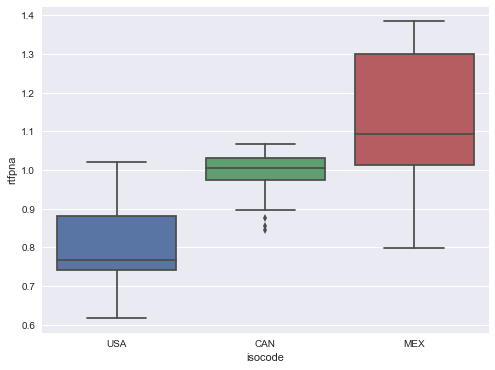

In [42]:
data = pd.concat([df['isocode'], df['rtfpna']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))

plt.xlabel('isocode')
plt.ylabel('rtfpna')

fig = sns.boxplot(x='isocode', y='rtfpna', data=data)

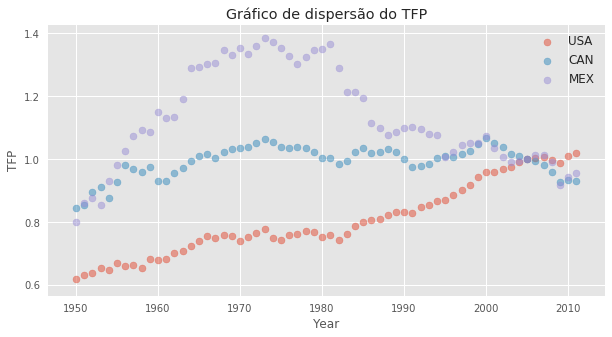

In [44]:
types=df['isocode'].unique()

plt.style.use('ggplot')

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)

for t in types:
    x=df.loc[df['isocode']==t, 'year']
    y=df.loc[df['isocode']==t, 'rtfpna']
    
    ax.scatter(x,y,alpha=0.5, label=t)

ax.set_title('Gráfico de dispersão do TFP')
ax.set_xlabel('Year')
ax.set_ylabel('TFP')

ax.legend(loc='higher right',fontsize=12)
plt.style.use('classic')

plt.show()

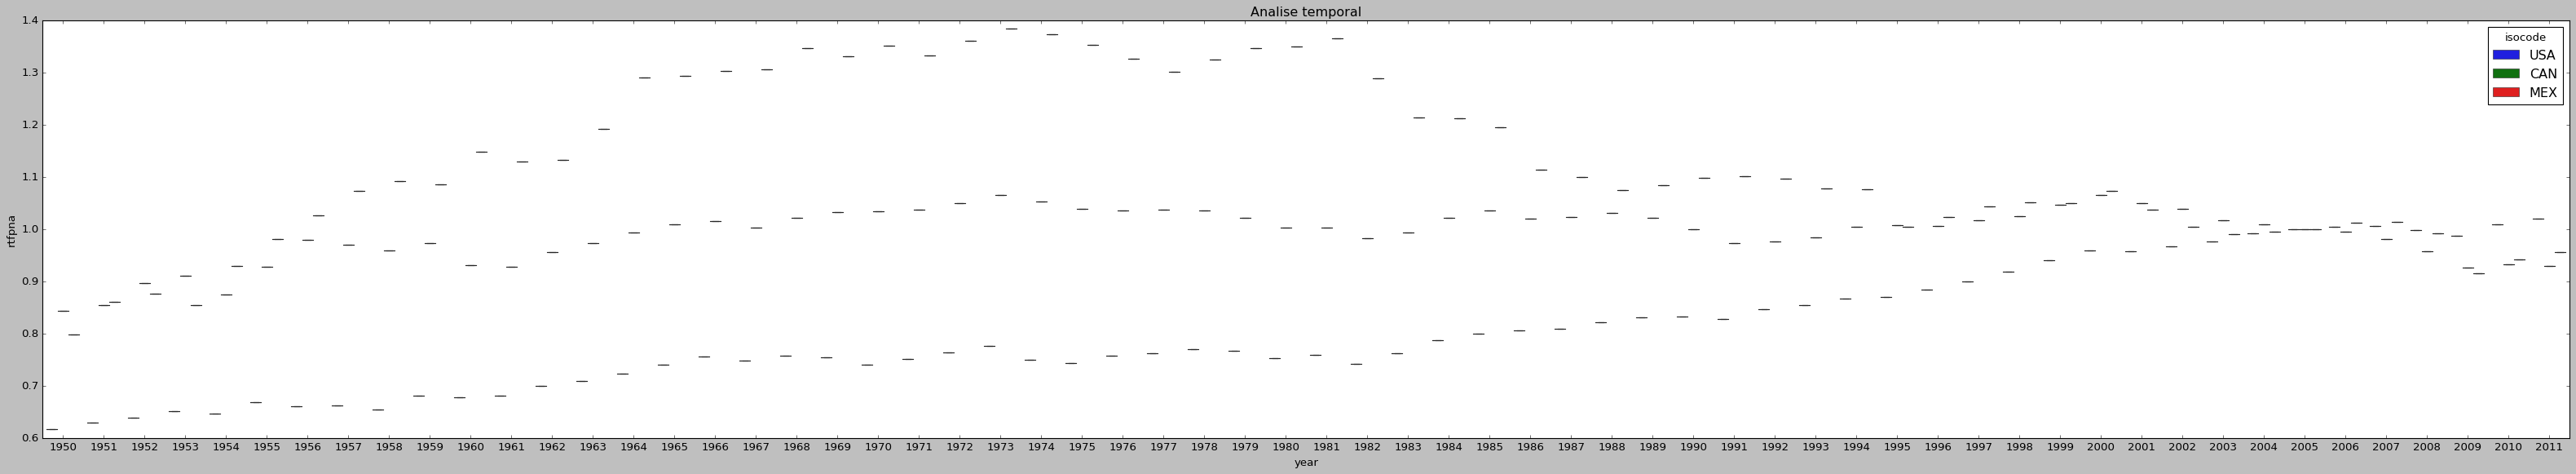

In [47]:
data = pd.concat([df['isocode'], df['rtfpna'], df['year']], axis=1)
f, ax = plt.subplots(figsize=(50, 8))
fig = sns.boxplot(x='year', y='rtfpna', data=data, showfliers=False, hue="isocode")
plt.title('Analise temporal') 

In [32]:
print(dfgroup.describe()['rtfpna'].round(2))

count    186.00
mean       0.98
std        0.18
min        0.62
25%        0.86
50%        1.00
75%        1.05
max        1.38
Name: rtfpna, dtype: float64


In [82]:
df_1=df.groupby(['isocode','rtfpna']).mean().round(0).reset_index()
df_1.head()

,isocode,rtfpna,year
0,CAN,0.843335,1950
1,CAN,0.855123,1951
2,CAN,0.875178,1954
3,CAN,0.896489,1952
4,CAN,0.910658,1953


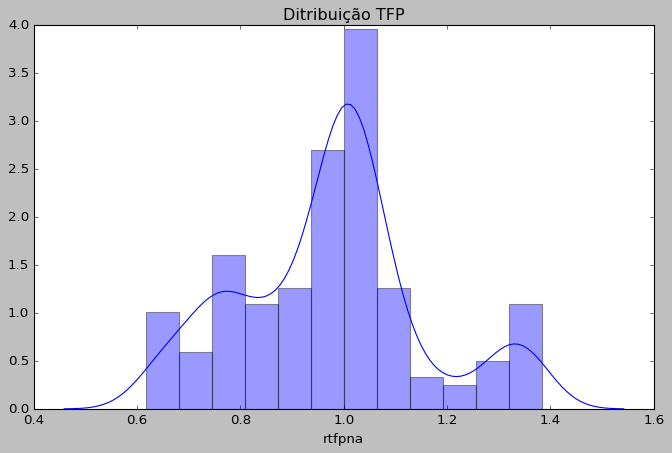

In [64]:
data = pd.concat([df_1['isocode'], df_1['rtfpna']], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(data['rtfpna'])
plt.title('Ditribuição TFP')

In [120]:
x_1 = df.loc[0:61]
y_1 = df.loc[62:123]
z_1 = df.loc[124:187]

In [122]:
x = x_1['rtfpna']
y = y_1['rtfpna']
z = z_1['rtfpna']

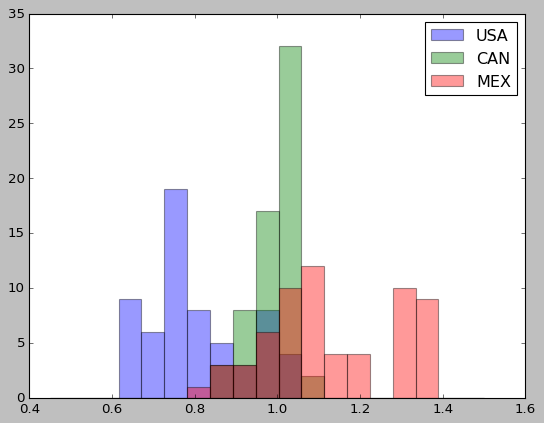

In [125]:
bins = np.linspace(0.45, 1.5, 20)

plt.hist(x, bins, alpha=0.4, label='USA')
plt.hist(y, bins, alpha=0.4, label='CAN')
plt.hist(z, bins, alpha=0.4, label='MEX')

plt.legend(loc='upper right')
plt.show()

In [140]:
print("TFP geral apresenta as seguintas caracteristicas analíticas:")
print("Simetria: ", df['rtfpna'].skew()) #Assimeria
print("Curtose: ", df['rtfpna'].kurt()) #Curtose
print ("min: ", df['rtfpna'].min())
print ("max: ", df['rtfpna'].max())

TFP geral apresenta as seguintas caracteristicas analíticas:
Simetria:  0.253623191997766
Curtose:  -0.038200326890446945
min:  0.6171478629112244
max:  1.3837183713912964


Estas análistes estatisticas, indicam que os dados sobre TFP se assemelham à uma distribuição normal. Em que métodos estatisticos paramétricos descrevem com maior precisão as inferencias obtidas por meio dos dados. 

In [142]:
print("TFP do EUA apresenta as seguintas caracteristicas analíticas:")
print("Simetria: ", x_1['rtfpna'].skew()) #Assimeria
print("Curtose: ", x_1['rtfpna'].kurt()) #Curtose
print ("min: ", x_1['rtfpna'].min())
print ("max: ", x_1['rtfpna'].max())

TFP do EUA apresenta as seguintas caracteristicas analíticas:
Simetria:  0.4355729860341456
Curtose:  -0.8879613964377393
min:  0.6171478629112244
max:  1.020391821861267


Ao analisar apenas o TFP do EUA, podemos ter uma observação semelhante, de que a distribuiçao dos dados se assemelha a uma distribuiçao normal. No entanto a curtose que caracteriza o achatamento do curva indica que a distibuiçao de frequencia da TFP está condesada.   

In [145]:
print("TFP no CAN apresenta as seguintas caracteristicas analíticas:")
print("Simetria: ", y_1['rtfpna'].skew()) #Assimeria
print("Curtose: ", y_1['rtfpna'].kurt()) #Curtose
print ("min: ", y_1['rtfpna'].min())
print ("max: ", y_1['rtfpna'].max())

TFP no CAN apresenta as seguintas caracteristicas analíticas:
Simetria:  -1.098721866648836
Curtose:  0.9434708709413013
min:  0.8433347940444946
max:  1.0661041736602783


Ja o TFP do CAN, observamos que os dados não se asemelham a uma distribuição normal, ja que a simétria excede o limite entre [-1,1] e a curtose caracteriza uma curva de distribuição mais achatada, ou seja as distribuiçoes estao mais espalhadas. Não ha concentraçao de dados em intervalo. 

In [147]:
print("TFP geral apresenta as seguintas caracteristicas analíticas:")
print("Simetria: ", z_1['rtfpna'].skew()) #Assimeria
print("Curtose: ", z_1['rtfpna'].kurt()) #Curtose
print ("min: ", z_1['rtfpna'].min())
print ("max: ", z_1['rtfpna'].max())

TFP geral apresenta as seguintas caracteristicas analíticas:
Simetria:  0.09035471571450358
Curtose:  -1.053163518664618
min:  0.7981593012809753
max:  1.3837183713912964


Ao analisar apenas o TFP do MEX, podemos ter uma observação semelhante ao do EUA, em que a distribuiçao dos dados se assemelha a uma distribuiçao normal. No entanto a curtose que caracteriza o achatamento do curva indica que a distibuiçao de frequência da TFP, ainda mais condensada que EUA. Ou seja, a maior frequência da ocorrecia do evento (tx TFP) esta proxima a uma média,mediana ou modo. 

In [152]:
grouped=df.groupby(['year','rtfpna']).agg('rtfpna')
print(grouped.shape)
print(grouped.head())
data=grouped[['isocode','year','rtfpna']]


dept=df['isocode'].unique()
dept.sort()
EUA = dept[0:61]
CAN = dept[62:123]
MEX = dept[124:187]


fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for i in EUA :
    data_1=data[data['isocode']==i]
    ax[0,0].plot(data_1['year'], data_1['rtfpna'],label='EUA')

for i in CAN :
    data_1=data[data['isocode']==i]
    ax[0,1].plot(data_1['year'], data_1['rtfpna'],label='CAN')
    
for i in MEX :
    data_1=data[data['isocode']==i]
    ax[1,0].plot(data_1['year'], data_1['rtfpna'],label='MEX')    
     
    
ax[0,0].set_title('Mean of TFP in EUA')
ax[0,1].set_title('Mean of TFP in CAN')
ax[1,0].set_title('Mean of TFP in MEX')


ax[0,0].set_ylabel('year')
ax[0,0].set_xlabel('tfp')
ax[0,1].set_ylabel('year')
ax[0,1].set_xlabel('tfp')
ax[1,0].set_ylabel('year')
ax[1,0].set_xlabel('tfp')

plt.show()

AttributeError: Cannot access attribute 'shape' of 'SeriesGroupBy' objects, try using the 'apply' method